# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farhan Lado Anggaraksa Mascahyanto
- **Email:** farhanladoam@gmail.com
- **ID Dicoding:** Farhan Lado Anggaraksa Mascahyanto
- **Link Dashboard Streamlit:** https://submissionbikeanalysis.streamlit.app/

## Menentukan Pertanyaan Bisnis

- Berapa banyak sepeda yang disewa oleh pengguna kasual dibandingkan dengan pengguna terdaftar?
- Berapa rata-rata jumlah sepeda yang disewa per hari?
- Bagaimana kecepatan angin dan suhu mempengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
# Membaca dataset dari file CSV
data = pd.read_csv('day.csv')


# Menampilkan beberapa baris awal untuk melihat isi data
data.head()


ukuran baris dan kolom:  (731, 16)
jumlah data kosong:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
jumlah data duplikat:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat 731 baris dan 16 kolom
- Tidak ada missing values yang terdeteksi
- Tidak ada data duplikat yang ditemukan

### Assessing Data

In [59]:
# Mengecek informasi umum tentang dataset
print("=== Informasi Umum Dataset ===")
data.info()

# Mengecek ukuran dataset (jumlah baris dan kolom)
print("\n=== Ukuran Baris dan Kolom ===")
print(f"Ukuran dataset: {data.shape[0]} baris dan {data.shape[1]} kolom")

# Mengecek jumlah data kosong (missing values) di setiap kolom
print("\n=== Jumlah Data Kosong di Setiap Kolom ===")
print(data.isnull().sum())

# Mengecek jumlah data duplikat
print("\n=== Jumlah Data Duplikat ===")
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

# Mengecek statistik deskriptif dari data
print("\n=== Statistik Deskriptif Dataset ===")
print(data.describe())

# Melihat tipe data dari setiap kolom
print("\n=== Tipe Data untuk Setiap Kolom ===")
print(data.dtypes)


=== Informasi Umum Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  0 non-null      float64       
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         


**Insight:**
- Tidak ada missing value
- Tidak ada data duplikat
- Terdapat 731 baris dan 16 kolom
- Rata-rata pengguna kasual: 848.18 sepeda per hari, dengan minimum 2 dan maksimum 3410.


### Cleaning Data

In [42]:
# Mengubah tipe data kolom dteday menjadi datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Mengonversi kolom 'season' ke nilai numerik
data['season'] = data['season'].map({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})

# Mengkonversi
data['weathersit'] = data['weathersit'].map({'Clear': 1, 'Mist': 2, 'Snow': 3})

# Menambahkan kolom tahun dan bulan untuk analisis lebih lanjut
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month

# Menampilkan informasi dataset setelah cleaning
print(data.info())

# Menampilkan 5 baris pertama setelah cleaning
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  0 non-null      float64       
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  year        731 non-null  

**Insight:**
- Penambahan kolom year dan month memungkinkan analisis lebih lanjut, seperti perbandingan penyewaan dari tahun ke tahun atau bulan ke bulan.
- Kolom casual dan registered memberikan informasi tentang jumlah penyewaan dari pengguna kasual dan terdaftar.
- Kolom temp, atemp, hum, dan windspeed menyediakan data tentang kondisi lingkungan yang dapat dianalisis untuk melihat dampaknya terhadap penyewaan sepeda.

## Exploratory Data Analysis (EDA)

### Explore Data Distribution

In [45]:
# Mengecek statistik deskriptif dari data
print(data.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000         0.0  731.000000  731.000000   
mean     0.028728    2.997264    0.683995         NaN    0.495385    0.474354   
min      0.000000    0.000000    0.000000         NaN 

- Rata-rata pengguna terdaftar: 3656.17 sepeda per hari, dengan minimum 20 dan maksimum 6946.
- Rata-rata workingday sekitar 0.68, menunjukkan bahwa sebagian besar hari dalam dataset adalah hari kerja
- Rata-rata holiday sangat rendah (0.03), yang menunjukkan bahwa data mayoritas tidak dikumpulkan pada hari libur.

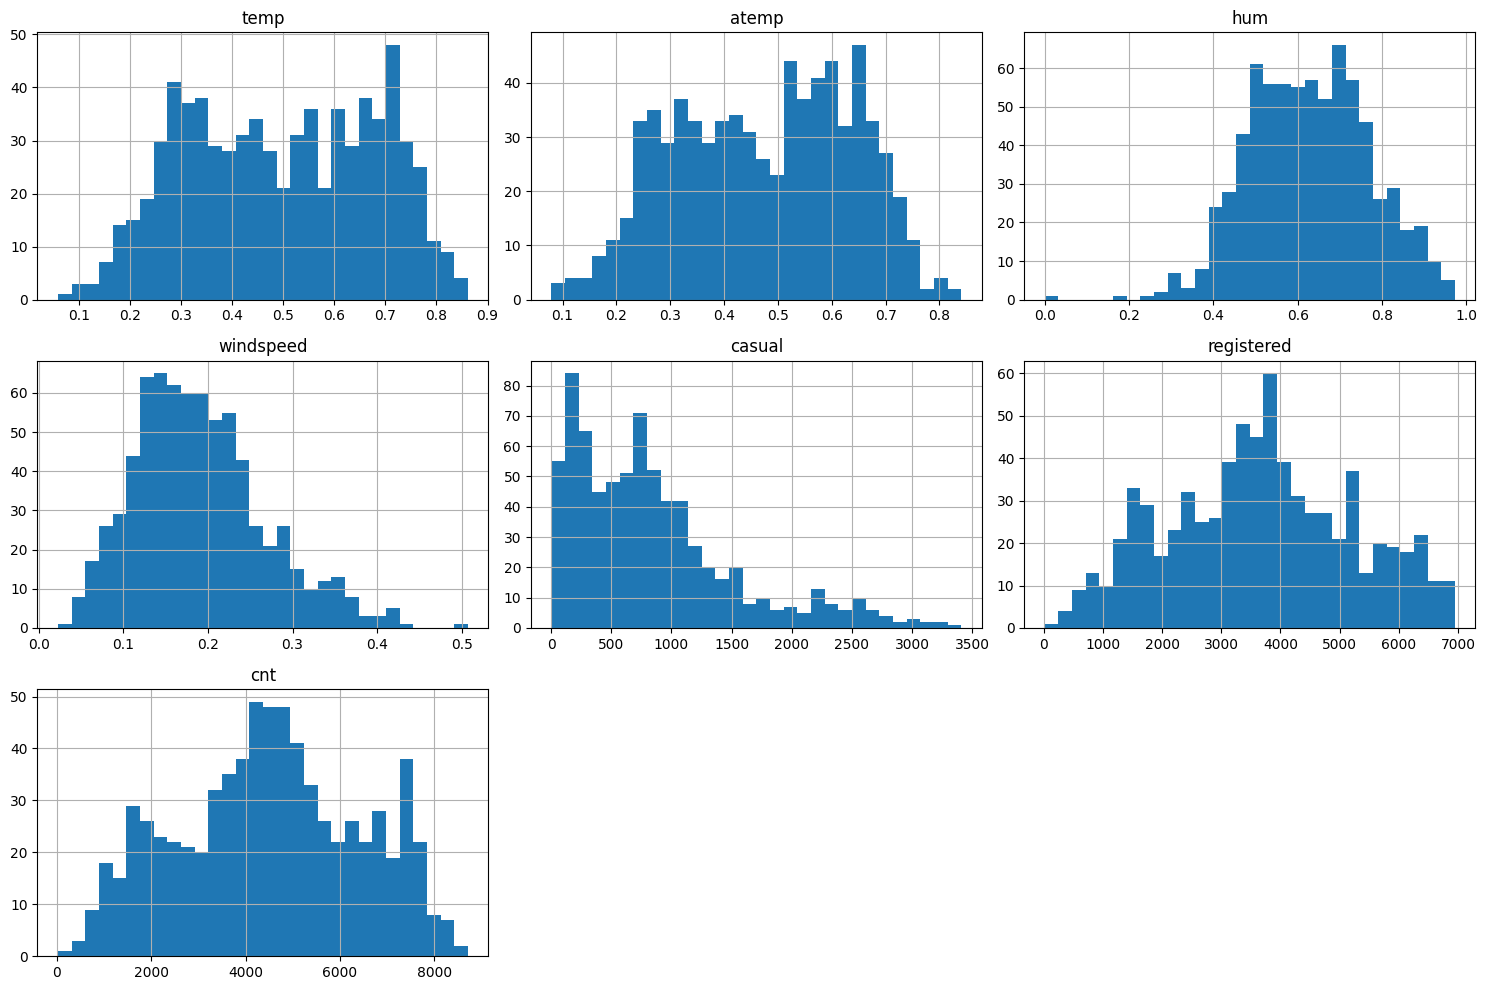

In [47]:
# Memilih kolom-kolom yang relevan saja
relevant_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Memeriksa distribusi data dari kolom-kolom tersebut
data[relevant_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Insight:**
- Suhu (temp dan atemp):
Distribusi suhu (temp) dan suhu yang dirasakan (atemp) cenderung normal, dengan mayoritas data berada di rentang menengah (sekitar 0.3 hingga 0.8).
Ini menunjukkan bahwa sebagian besar penyewaan sepeda terjadi dalam kondisi suhu yang sedang, tidak terlalu panas atau dingin.

- Kelembapan (hum):
Kelembapan juga memiliki distribusi yang normal, dengan sebagian besar berada di sekitar 0.4 hingga 0.8.
Ini menunjukkan bahwa pengguna sepeda lebih aktif pada kelembapan menengah, dan ada penurunan aktivitas penyewaan ketika kelembapan terlalu rendah atau terlalu tinggi.

- Kecepatan Angin (windspeed):
Distribusi kecepatan angin menunjukkan kecenderungan lebih banyak di kecepatan rendah, dengan penurunan tajam di kecepatan angin yang lebih tinggi.
Pengguna cenderung tidak menyewa sepeda dalam kondisi angin yang kuat, karena mungkin terasa kurang nyaman atau lebih sulit untuk bersepeda.

- Pengguna Kasual (casual):
Pengguna kasual cenderung memiliki distribusi yang lebih menyebar, dengan sebagian besar penyewaan di bawah 1000 penyewaan per hari.
Ini menunjukkan bahwa penyewaan oleh pengguna kasual tidak terlalu tinggi dibandingkan pengguna terdaftar.

- Pengguna Terdaftar (registered):
Sebaliknya, pengguna terdaftar memiliki distribusi yang lebih terpusat, dengan banyak hari yang mencatat sekitar 2000 hingga 6000 penyewaan.
Ini menunjukkan bahwa pengguna terdaftar lebih sering menyewa sepeda dibandingkan pengguna kasual.

- Total Penyewaan Sepeda (cnt):
Distribusi total penyewaan (cnt) menyerupai distribusi pengguna terdaftar, yang menunjukkan bahwa penyewaan sepeda didominasi oleh pengguna yang terdaftar.
Sebagian besar total penyewaan sepeda berkisar antara 2000 hingga 6000 sepeda per hari, dengan beberapa hari yang mencatat lebih dari 8000 penyewaan.

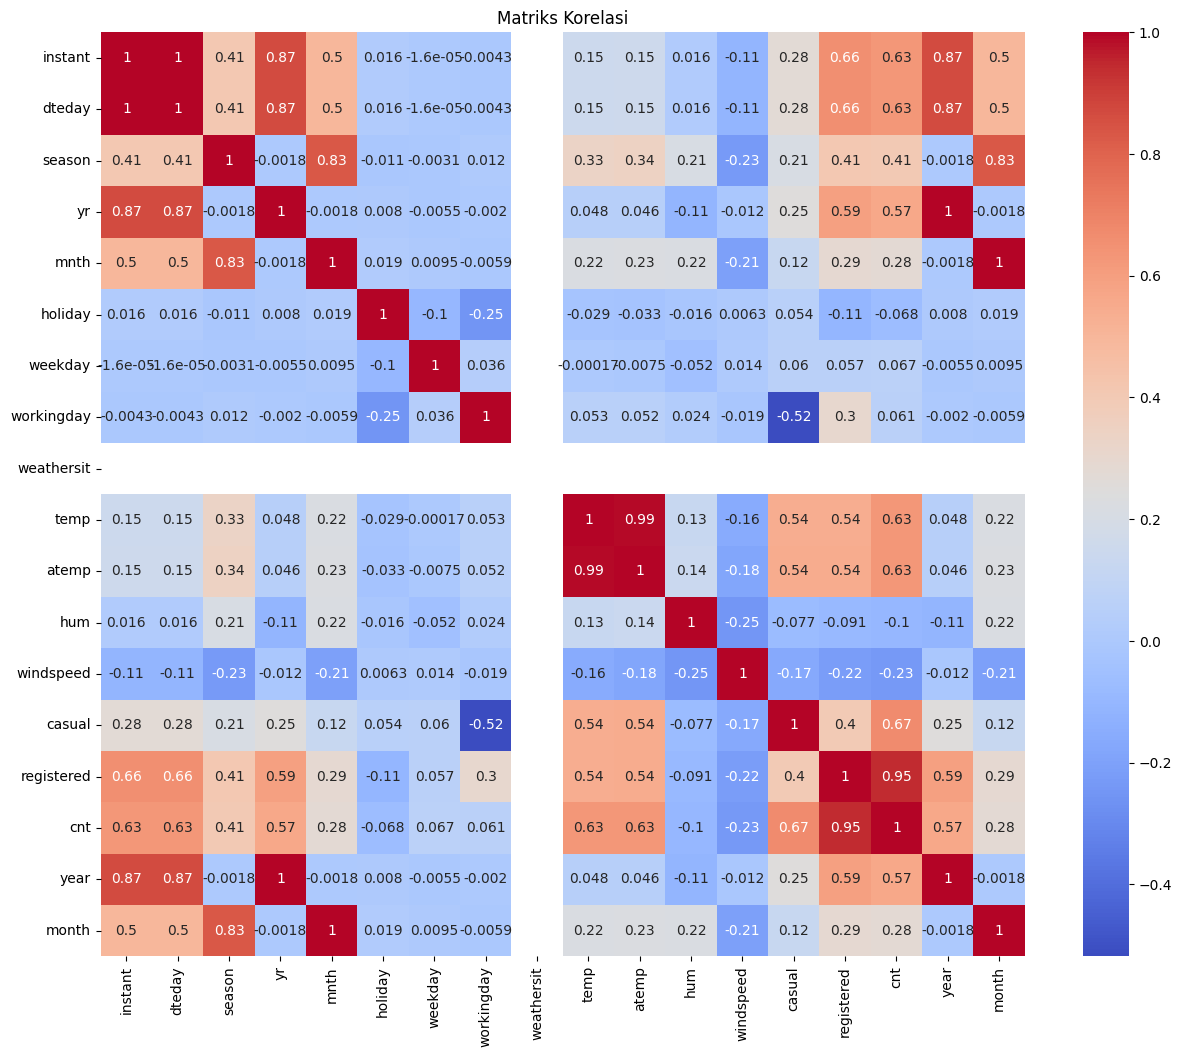

In [51]:
# Menghitung matriks korelasi
corr = data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

- Hubungan antara 'registered' dan 'cnt':
Terdapat korelasi yang sangat tinggi antara variabel registered (0.95) dan cnt (total count). Ini menunjukkan bahwa sebagian besar pengguna sepeda yang terdaftar berkontribusi besar terhadap total pengguna.

- Hubungan antara 'casual' dan 'cnt':
Korelasi antara casual dan cnt juga cukup kuat (0.67). Ini menunjukkan bahwa pengguna tidak terdaftar (casual) juga memberikan kontribusi yang signifikan terhadap total penggunaan sepeda, tetapi tidak sekuat yang terdaftar.

- Korelasi suhu ('temp', 'atemp'):
Korelasi antara suhu aktual (temp) dan suhu yang dirasakan (atemp) sangat tinggi (0.99), yang dapat diharapkan karena keduanya terkait dengan persepsi suhu.
Selain itu, suhu (temp) berkorelasi positif dengan penggunaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna tidak terdaftar (casual), menunjukkan bahwa lebih banyak orang menggunakan sepeda saat cuaca lebih hangat.

- Pengaruh 'yr' (tahun):
Variabel yr menunjukkan korelasi positif yang kuat dengan cnt (0.57) dan registered (0.59). Ini bisa menunjukkan adanya peningkatan penggunaan sepeda dari tahun ke tahun.

- Pengaruh cuaca ('weathersit'):
Korelasi weathersit dengan variabel lain cenderung rendah. Korelasi negatif (-0.25) dengan windspeed menunjukkan bahwa kecepatan angin yang tinggi mungkin dikaitkan dengan kondisi cuaca yang lebih buruk.

- Pengaruh hari kerja ('workingday') dan liburan ('holiday'):
Variabel workingday memiliki korelasi negatif dengan casual (-0.52), yang berarti pada hari kerja, penggunaan sepeda oleh pengguna tidak terdaftar cenderung lebih rendah. Namun, korelasinya rendah dengan cnt, sehingga total penggunaan sepeda tidak terlalu dipengaruhi oleh hari kerja.
Holiday tidak menunjukkan hubungan yang kuat dengan penggunaan sepeda secara keseluruhan (cnt).

- Pengaruh bulan ('mnth'):
Bulan (mnth) menunjukkan korelasi positif dengan cnt (0.28), yang menunjukkan bahwa ada variasi penggunaan sepeda berdasarkan musim atau bulan, meskipun tidak terlalu kuat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak sepeda yang disewa oleh pengguna kasual dibandingkan dengan pengguna terdaftar?

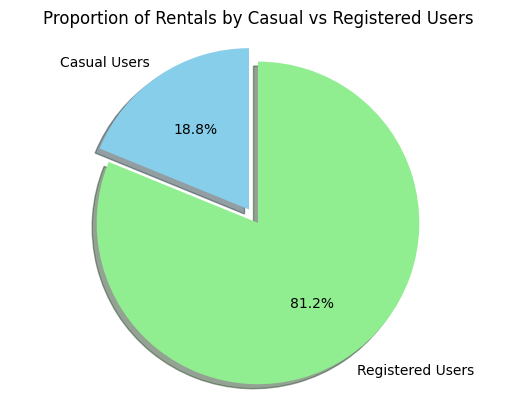

In [53]:
# Menghitung total penyewaan sepeda oleh pengguna kasual dan terdaftar
total_casual = data['casual'].sum()
total_registered = data['registered'].sum()

# Membuat pie chart
labels = ['Casual Users', 'Registered Users']
sizes = [total_casual, total_registered]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Rentals by Casual vs Registered Users')
plt.axis('equal')
plt.show()

### Pertanyaan 2: Berapa rata-rata jumlah sepeda yang disewa per hari?

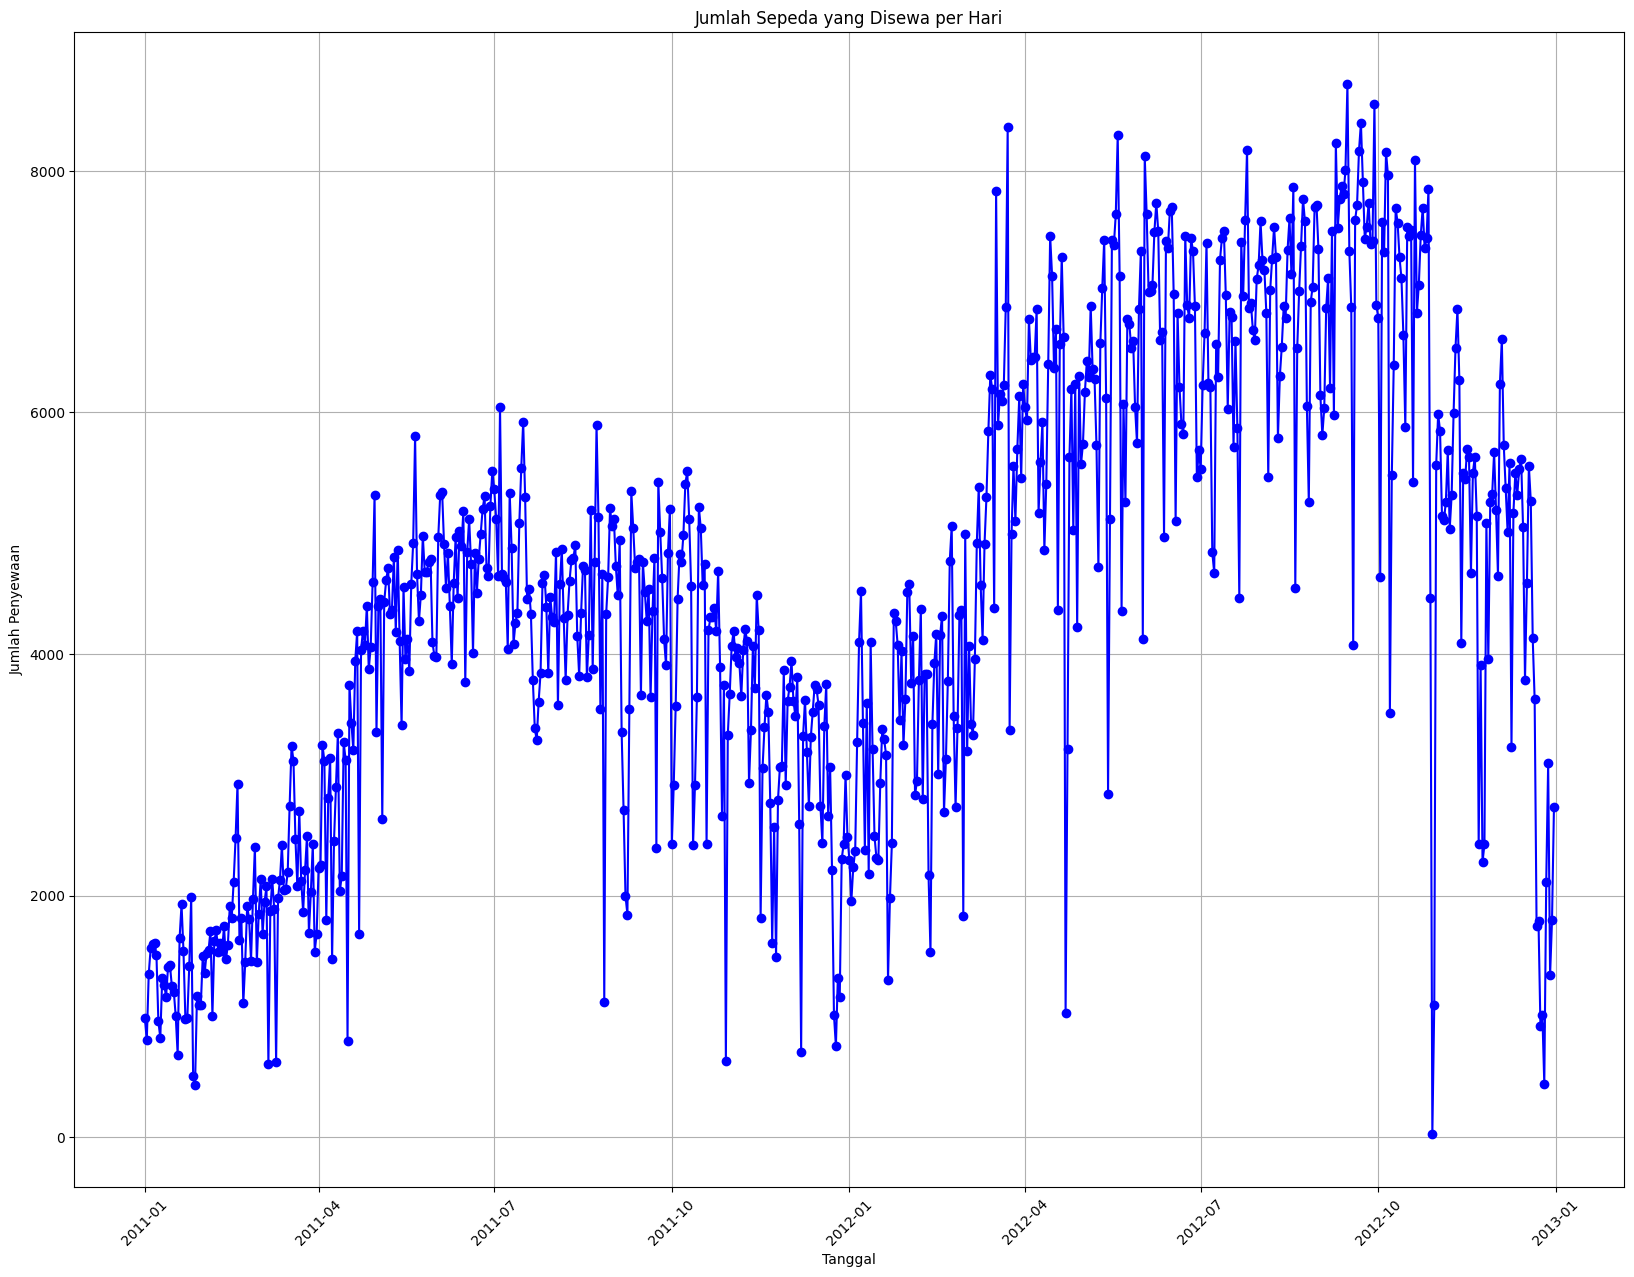

In [56]:
# Menghitung rata-rata jumlah sepeda yang disewa per hari
average_rentals_per_day = data['cnt'].mean()

# Menghitung jumlah penyewaan per hari
daily_rentals = data.groupby('dteday')['cnt'].sum()

# Membuat line plot untuk visualisasi
plt.figure(figsize=(20, 15))
plt.plot(daily_rentals.index, daily_rentals.values, color='blue', marker='o')
plt.title('Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Pertanyaan 3: Bagaimana kecepatan angin dan suhu mempengaruhi penyewaan sepeda?

Korelasi antara kecepatan angin dan penyewaan sepeda: -0.23
Korelasi antara suhu dan penyewaan sepeda: 0.63


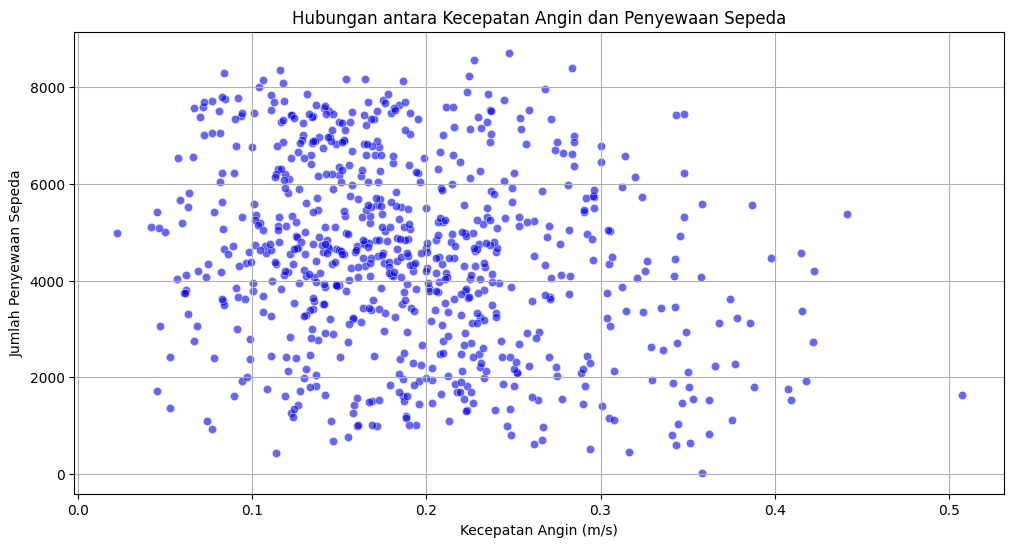

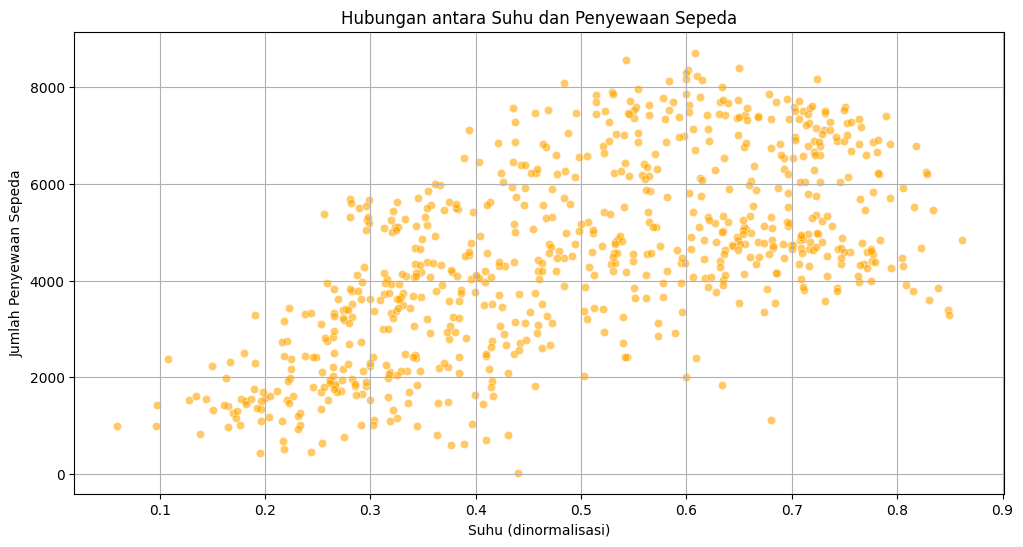

In [58]:
# Menghitung korelasi
correlation_windspeed = data['windspeed'].corr(data['cnt'])
correlation_temp = data['temp'].corr(data['cnt'])

print(f"Korelasi antara kecepatan angin dan penyewaan sepeda: {correlation_windspeed:.2f}")
print(f"Korelasi antara suhu dan penyewaan sepeda: {correlation_temp:.2f}")

# Membuat scatter plot untuk kecepatan angin
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='cnt', data=data, color='blue', alpha=0.6)
plt.title('Hubungan antara Kecepatan Angin dan Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()
plt.show()

# Membuat scatter plot untuk suhu
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=data, color='orange', alpha=0.6)
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (dinormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()
plt.show()


**Insight:**
- Proporsi Penyewaan oleh Pengguna Kasual vs Pengguna Terdaftar:
 * Berdasarkan grafik pertama (diagram pie), pengguna terdaftar mendominasi penyewaan sepeda, menyumbang 81.2% dari total penyewaan, sementara pengguna kasual hanya menyumbang 18.8%.
 * Ini menunjukkan bahwa mayoritas penyewaan dilakukan oleh pengguna yang telah terdaftar, mungkin karena mereka lebih sering menggunakan layanan ini atau mendapatkan keuntungan khusus dibandingkan pengguna kasual.

- Rata-rata Penyewaan Sepeda per Hari:
 * Grafik kedua menunjukkan jumlah penyewaan sepeda per hari sepanjang tahun, yang menunjukkan adanya tren musiman yang jelas. Penyewaan sepeda meningkat dari awal tahun, mencapai puncaknya pada musim panas (sekitar Juli-Agustus), dan menurun tajam menjelang musim dingin.
 * Rata-rata penyewaan sepeda harian selama periode puncak berkisar antara 4000-6000 sepeda per hari, dengan variasi harian yang cukup besar. Ini mengindikasikan adanya pengaruh cuaca atau musim terhadap permintaan penyewaan sepeda.

- Pengaruh Kecepatan Angin dan Suhu terhadap Penyewaan Sepeda:
 * Kecepatan Angin: Berdasarkan scatter plot dan nilai korelasi -0.23, ada hubungan negatif yang lemah antara kecepatan angin dan penyewaan sepeda. Ketika kecepatan angin meningkat, jumlah penyewaan cenderung menurun. Namun, karena nilai korelasi ini rendah, dampaknya tidak terlalu signifikan. Ini bisa disebabkan oleh kenyamanan bersepeda yang menurun saat angin lebih kencang, meskipun tidak selalu menjadi faktor yang menghalangi.
 * Suhu: Scatter plot menunjukkan adanya korelasi positif yang kuat antara suhu dan penyewaan sepeda, didukung dengan nilai korelasi 0.63. Saat suhu meningkat, jumlah penyewaan sepeda juga meningkat secara signifikan. Ini menunjukkan bahwa orang lebih suka bersepeda ketika cuaca lebih hangat. Pada suhu optimal, jumlah penyewaan bisa mencapai 6000-8000 sepeda per hari.


## Conclusion

- Kesimpulan:
 * Pengguna terdaftar lebih dominan dalam menggunakan layanan penyewaan sepeda dibandingkan pengguna kasual.
 * Penyewaan sepeda menunjukkan pola musiman, dengan puncaknya terjadi selama musim panas.
 * Suhu merupakan faktor yang memiliki dampak signifikan terhadap penyewaan sepeda. Semakin hangat cuaca, semakin banyak sepeda yang disewa. Kecepatan angin, meskipun memiliki dampak negatif, pengaruhnya relatif kecil terhadap keputusan penyewaan.
